# Calculation of G-C Skew from NCBI Fasta Files

In [1]:
#Imports
import matplotlib.pyplot as plt
import os
from Bio import SeqIO
from Bio import Entrez
from Bio.Seq import Seq
Entrez.email = 'ethanathey@ucsb.edu'

In [40]:
#Retrieves FASTA file from ncbi 

def retrieve_FASTA_info(id):
    filename = id + ".fna"

    print("Downloading FASTA information of", id, "...")
    net_handle = Entrez.efetch( db="nucleotide", id=id, rettype="fasta", retmode="text")
    out_handle = open(filename, "w")
    out_handle.write(net_handle.read())
    out_handle.close()
    net_handle.close()
    print("Saved to:", filename)
    
    print("Parsing...")
    record = SeqIO.read(filename, "fasta")
    
    print('Description:', record.description)
    
    return record


In [43]:
#Storage and retrieval of whole e.Coli genome

eColiUW = retrieve_FASTA_info("NC_000913.3") #e.Coli k-12 genome from Univ. Wisconsin (1997)
print('---------------------')
eColiGIRC = retrieve_FASTA_info("NC_002695.2") #e.coli from Makino et. al (1999)

Saved to: NC_000913.3.fna
Parsing...
file class: <class 'Bio.SeqRecord.SeqRecord'>
Description: NC_000913.3 Escherichia coli str. K-12 substr. MG1655, complete genome
---------------------
Saved to: NC_002695.2.fna
Parsing...
file class: <class 'Bio.SeqRecord.SeqRecord'>
Description: NC_002695.2 Escherichia coli O157:H7 str. Sakai DNA, complete genome


In [57]:
#Calculates and plots a G-C score, returns plot and position of OriC
def gcPlot(seq):
    
    
    GC_skew = [0]*len(seq)
    for idx in range(len(seq)):
        if seq[idx] == 'G':
            GC_skew[idx] = GC_skew[idx-1] + 1
        elif seq[idx] == 'C':
            GC_skew[idx] = GC_skew[idx-1] - 1
        else:
            GC_skew[idx] = GC_skew[idx-1]

    #Plotting
    fig, ax = plt.subplots()
    ax.plot(GC_skew)
    
    #Labels
    xlabel = plt.xlabel('Base position')
    ylabel = plt.ylabel('G-C score')
    title = plt.title(seq.id)
    
   #returns highest value in GC_skew, this point is terC 
    print("Location of",seq.id,"OriC:", GC_skew.index(max(GC_skew)))

Location of NC_000913.3 OriC: 1552388
Location of NC_002695.2 OriC: 2073767


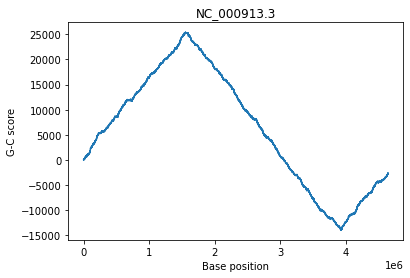

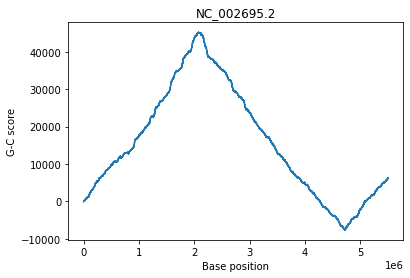

In [58]:
gcPlot(eColiUW)
gcPlot(eColiGIRC)